In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import fmin_tnc
from sklearn.metrics import accuracy_score

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
def cost_func(theta, X, y, lambda_):
    m = y.shape[0]
    h = sigmoid(X @ theta)
    J = -np.sum(y * np.log(h) + (1 - y) * np.log(1-h)) / m
    reg = (lambda_ / (2*m)) * np.sum(theta[1:] ** 2)
    J = J + reg
    
    delta = ((h - y).T @ X).T / m
    grad = np.zeros((theta.shape))
    grad[0] = delta[0]
    grad[1:] = delta[1:] + (lambda_ / m) * theta[1:]
    return J, grad

## Binary Classification

### Gradient Descent

In [4]:
class GradientDescent:
    def __init__(self, X, y):
        self.X = X.astype(float)
        self.y = y.astype(float)
        self.m = X.shape[0]            # no. of data
        self.n = X.shape[1]            # no. of features
        self.theta = np.zeros((self.n, 1))
        
    def fit(self, alpha, no_iter, lambda_):
        J = []
        for _ in range(no_iter):
            cost, grad = cost_func(self.theta, self.X, self.y, lambda_)
            self.theta = self.theta - (alpha * grad)
            J.append(cost)
            
        plt.plot(np.arange(no_iter), J)
        plt.xlabel('No. of iterations')
        plt.ylabel('$J(\Theta)$')
        plt.show()
    
    def predict(self, X_test):
        bin_func = np.vectorize(lambda v: 1 if v >= 0.5 else 0)
        return bin_func(sigmoid(X_test @ self.theta))

### Advanced Optimization

In [5]:
class AdvancedOptimization:
    def __init__(self, X, y):
        self.X = X.astype(float)
        self.y = y.astype(float)
        self.m = X.shape[0]            # no. of data
        self.n = X.shape[1]            # no. of features
        self.theta = np.zeros((self.n, 1))
        
    def fit(self, lambda_):
        out = fmin_tnc(func=cost_func, x0=self.theta, args=(self.X, self.y.flatten(), lambda_))
        self.theta = out[0].reshape((self.n, 1))
    
    def predict(self, X_test):
        bin_func = np.vectorize(lambda v: 1 if v >= 0.5 else 0)
        return bin_func(sigmoid(X_test @ self.theta))

### Examples

In [6]:
def map_feature(x1, x2, degree=1):
    '''
    return: 1, x, y, x**2, xy, y**2, x**3, x**2 y, x y**2, y**3, ... 
    '''
    out = np.ones((x1.shape[0], 1))
    for i in range(1, degree+1):
        for j in range(i+1):
            terms = (x1**(i-j) * x2**j).reshape(-1, 1)
            out = np.hstack((out, terms))
    return out

In [7]:
df = pd.read_csv('..\datasets\ex2data2.txt', header=None)
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape, y.shape)

(118, 2) (118,)


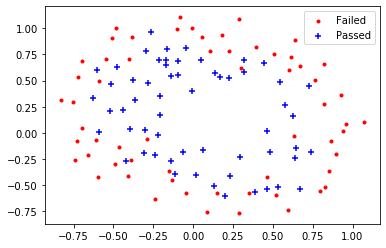

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='.', label='Failed')
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', marker='+', label='Passed')
plt.legend()
plt.show()

In [10]:
X_train = map_feature(X[:, 0], X[:, 1], degree=6)
y_train = y.reshape(-1, 1)

#### Using gradient descent algorithm 

In [11]:
gd = GradientDescent(X_train, y_train)

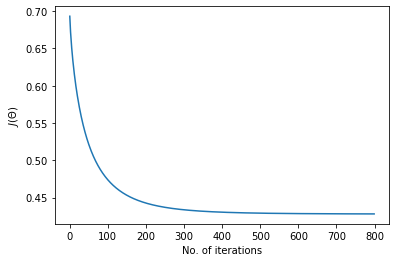

In [12]:
gd.fit(alpha=1, no_iter=800, lambda_=0.2)

In [13]:
y_pred = gd.predict(X_train)

In [14]:
accuracy_score(y_train, y_pred)

0.8305084745762712

In [15]:
# Desicion Boundary
u = np.linspace(-1, 1.5, 100)
v = np.linspace(-1, 1.5, 100)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = gd.predict(map_feature(np.array([ u[i] ]), np.array([ v[j] ]), degree=6))

<ipython-input-16-fcad9e58b9e5>:3: UserWarning: No contour levels were found within the data range.
  plt.contour(u, v, z.T, 0)


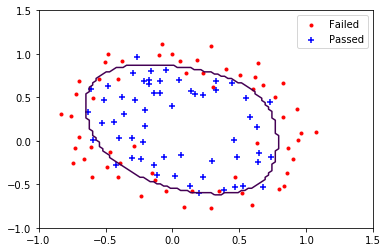

In [16]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='.', label='Failed')
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', marker='+', label='Passed')
plt.contour(u, v, z.T, 0)
plt.legend()
plt.show()

#### Using fmin_tnc

In [17]:
ao = AdvancedOptimization(X_train, y_train)

In [18]:
ao.fit(lambda_=1)

In [19]:
y_pred2 = ao.predict(X_train)

In [20]:
accuracy_score(y_train, y_pred2)

0.8305084745762712